In [1]:
# copy & paste this cell in new notebook 
# to have all the libraries we're working with
# and the og data, modified df, X (feature vars) and y (target var)

# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from operator import itemgetter # for sorting a list of tuples based on the second element of ea tuple.
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.pipeline import make_pipeline

In [2]:
# og Data, df, X, y
data = pd.read_csv('../../src/data/syriatel_customer_churn.csv')
df = data.drop(['area code', 'phone number'], axis=1)
X = df.drop('churn', axis=1)
y = df['churn']

In [4]:
# group checkpoint notes:

# ohe area code to see if it affects model performance

---

## Importing Data

In [3]:
data = pd.read_csv('../../src/data/syriatel_customer_churn.csv')

pd.set_option('display.max_columns', None)

data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# target balance
# churn:

data.churn.value_counts(normalize=True)

# False = Stayed (0) - 86%
# True = Left (1) - 14% (churn)

# true negative = [0][0] = predicted stayed(false) == actually stayed(false)
# false negative = [1][0] = predicted stayed(false) !! actually left(true) --> secondary goal --> minimize this
# false positive = [0][1] = predicted left(true) !! actually stayed(false)
# true positive = [1][1] = predicted left(true) == actually left(true)

False    0.855086
True     0.144914
Name: churn, dtype: float64

---

## EDA

#### ---

#### n/as

In [7]:
# checking og data.info()

data.info()

# no n/as

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#### ---

#### duplicates

In [8]:
# checking for dupicates

data.duplicated().value_counts()

# no duplicates

False    3333
dtype: int64

#### ---

#### plotting feature to target correlation

In [9]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

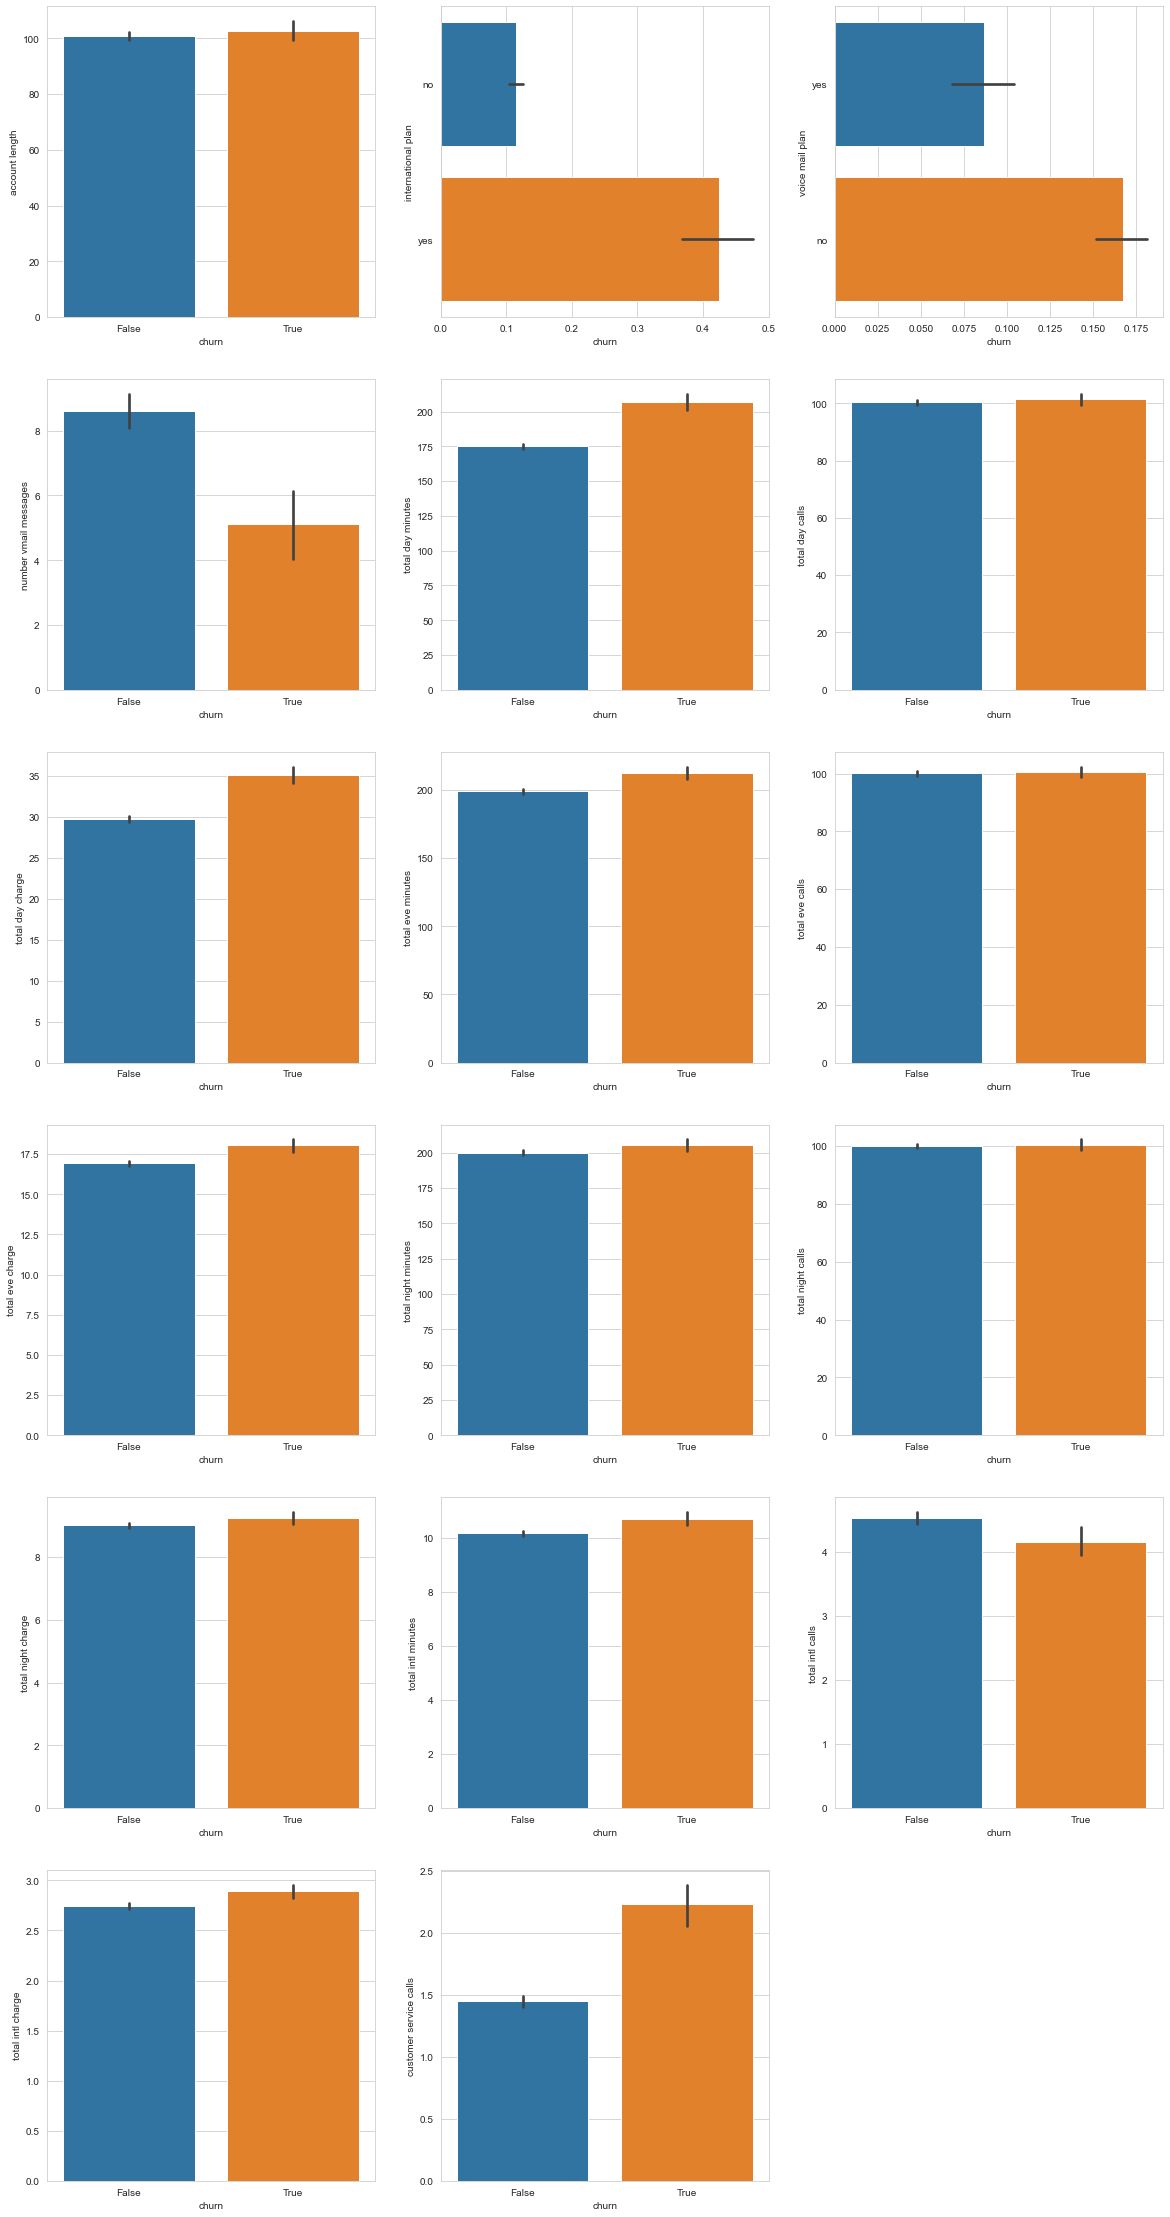

In [10]:
# ran this on data_og to see the correlation between churn and ea individual
# put this in EDA

sns.set_style("whitegrid")
fig = plt.figure(figsize = [20,40])
cols = ['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls']
cnt = 1
for col in cols :
    plt.subplot(6,3,cnt)
    sns.barplot(data = data, x = 'churn', y = col)
    cnt+=1
plt.show()  

#### International and voicemail plan subscriber count

In [12]:
df.shape

# dan corley
# hamza masood

# guys from the alumni panel

(3333, 19)

In [13]:
df['international plan'].value_counts(normalize=True)

no     0.90309
yes    0.09691
Name: international plan, dtype: float64

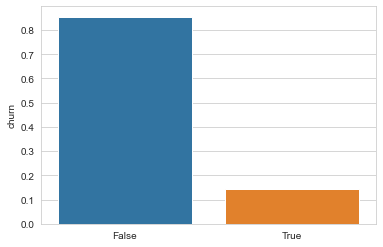

In [121]:
sns.barplot(x=df.churn.value_counts().index, y=df.churn.value_counts(normalize=True))

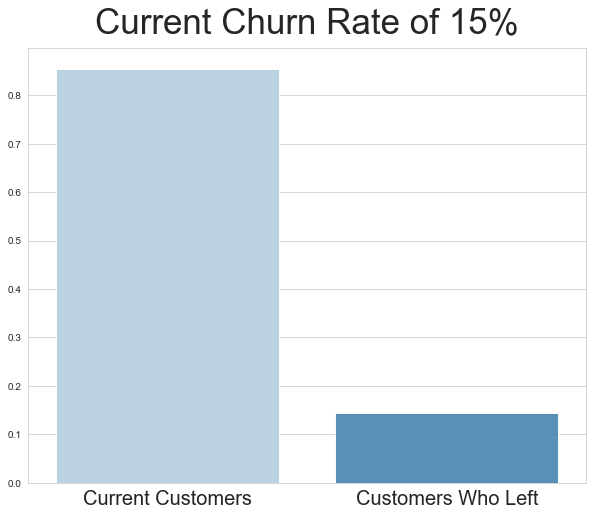

In [135]:
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=df.churn.value_counts().index, y=df.churn.value_counts(normalize=True), ci=None, alpha = 0.9, palette="Blues")
ax.set_title('Current Churn Rate of 15%', fontsize=35, pad = 15)
ax.set_xlabel('', fontsize = 13)
ax.set_xticklabels(["Current Customers", "Customers Who Left"], fontsize = 20)
ax.set_ylabel('', fontsize = 20);
plt.savefig('churn_rate.png')

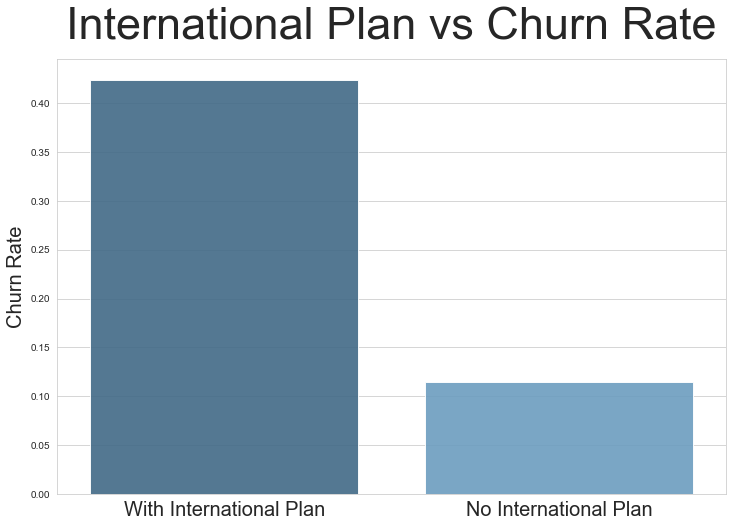

In [116]:
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=df['international plan'], y=df['churn'], ci=None, alpha = 0.9,  order= ['yes', 'no'], palette='Blues_d')
ax.set_title('International Plan vs Churn Rate', fontsize=45, pad = 20)
ax.set_xlabel('', fontsize = 13)
ax.set_xticklabels(["With International Plan", "No International Plan"], fontsize = 20)
ax.set_ylabel('Churn Rate', fontsize = 20);
plt.savefig('international_plan_churn.png')

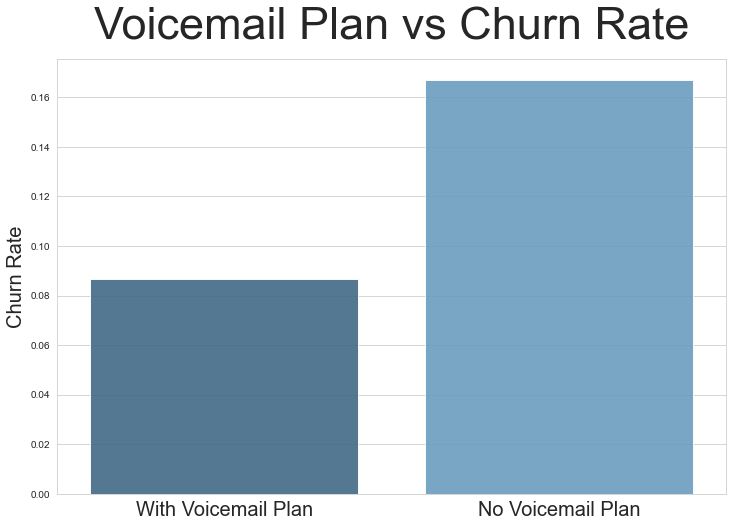

In [117]:
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=df['voice mail plan'], y=df['churn'], ci=None, alpha = 0.9, palette='Blues_d')
ax.set_title('Voicemail Plan vs Churn Rate', fontsize=45, pad = 20)
ax.set_xlabel('', fontsize = 13)
ax.set_xticklabels(["With Voicemail Plan", "No Voicemail Plan"], fontsize = 20)
ax.set_ylabel('Churn Rate', fontsize = 20);
plt.savefig('voicemail plan.png')

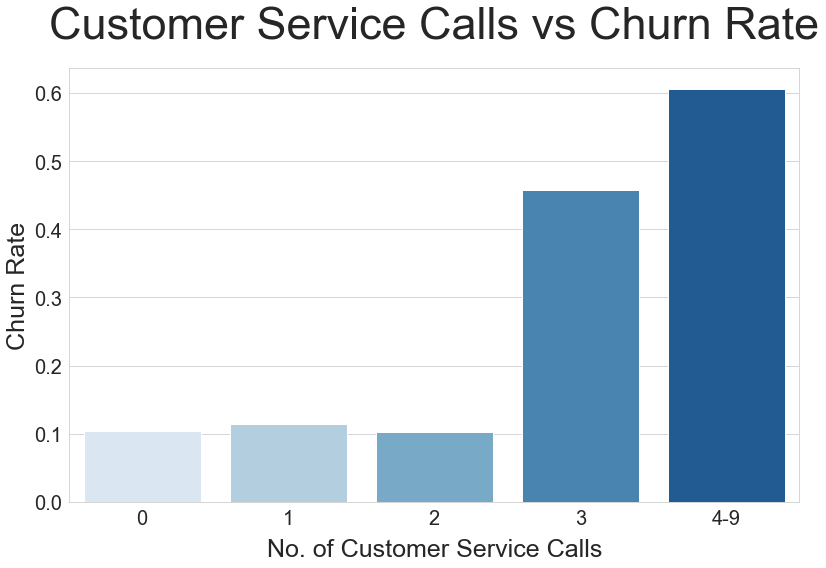

In [143]:
df_customer_serv_calls = df[['customer service calls','churn']].copy()

df_customer_serv_calls['bins'] = pd.cut(df_customer_serv_calls['customer service calls'],
                              bins=list(range(0,6,1)),
                              labels=list(range(0,5)))


cust_svc_calls = df_customer_serv_calls.groupby(['bins'])['churn'].mean()

fig, ax = plt.subplots(figsize =(12,8))
sns.barplot(x = cust_svc_calls.index, y = cust_svc_calls.values, ax = ax, palette = "Blues")

plt.title('Customer Service Calls vs Churn Rate', pad= 30, fontsize = 45)
plt.xlabel('No. of Customer Service Calls', fontsize = 25, labelpad= 10)
plt.ylabel('Churn Rate', fontsize = 25)
ax.set_xticklabels(['0', '1', '2','3', '4-9'])

ax.tick_params(labelsize = 20)
plt.tight_layout()

plt.savefig('customer_service_calls_churn.png')

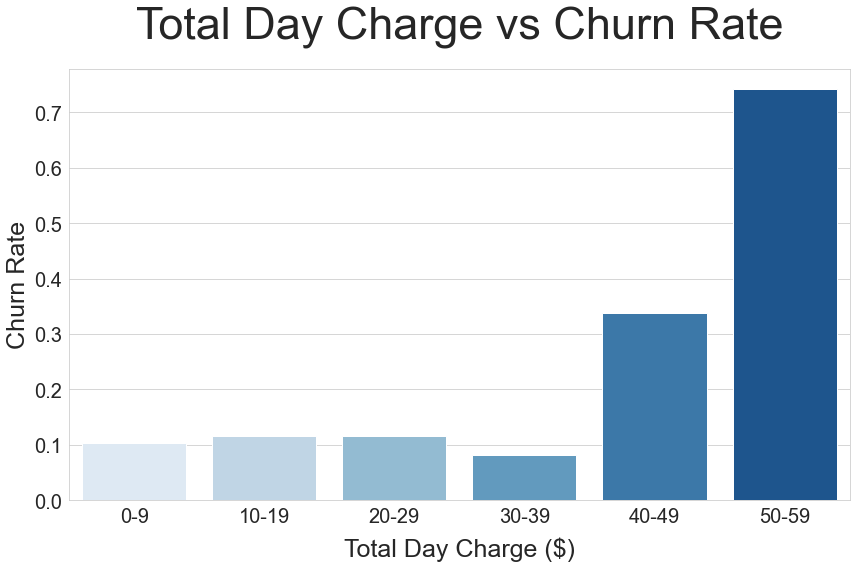

In [141]:
df_tot_day_charge = data[['total day charge','churn']].copy()

df_tot_day_charge['bins'] = pd.cut(df_tot_day_charge['total day charge'],
                              bins=list(range(0,70,10)),
                              labels=list(range(0,6)))

tot_day_charge = df_tot_day_charge.groupby(['bins'])['churn'].mean()

fig, ax = plt.subplots(figsize =(12,8))
sns.barplot(x = tot_day_charge.index, y = tot_day_charge.values, ax = ax, palette = "Blues")

plt.title('Total Day Charge vs Churn Rate', pad= 30, fontsize = 45)
plt.xlabel('Total Day Charge ($)', fontsize = 25, labelpad= 10)
plt.ylabel('Churn Rate', fontsize = 25)
ax.set_xticklabels(['0-9', '10-19', '20-29','30-39', '40-49', '50-59'])

ax.tick_params(labelsize = 20)
plt.tight_layout()

plt.savefig('total_day_charge_churn.png')

In [85]:
data['total intl calls'].value_counts()

3     668
4     619
2     489
5     472
6     336
7     218
1     160
8     116
9     109
10     50
11     28
0      18
12     15
13     14
15      7
14      6
18      3
16      2
19      1
17      1
20      1
Name: total intl calls, dtype: int64

In [144]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


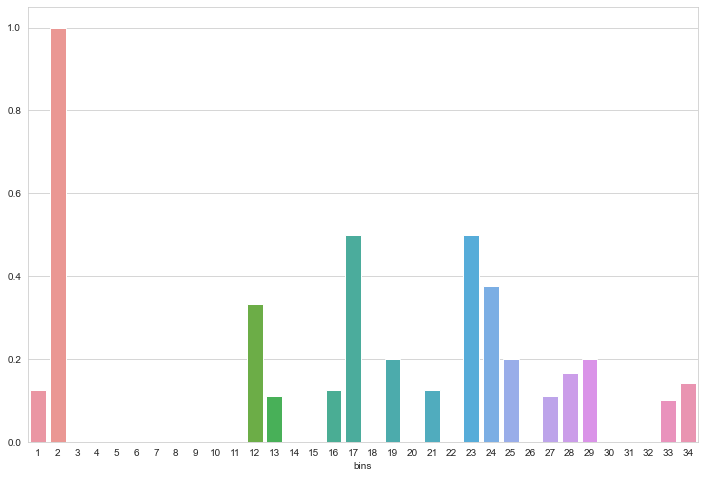

In [156]:
# 1-7, 6-14

243/7

df_account_len = data[['account length','churn']].copy()

df_account_len['bins'] = pd.cut(df_account_len['account length'],
                              bins=list(range(0,35,1)),
                              labels=list(range(1,35)))


account_len = df_account_len.groupby(['bins'])['churn'].mean()

fig, ax = plt.subplots(figsize =(12,8))
sns.barplot(x = account_len.index, y = account_len.values, ax = ax)

In [152]:
data[data['account length'] < 7]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
158,MO,6,510,350-9994,no,no,0,183.6,117,31.21,256.7,72,21.82,178.6,79,8.04,10.2,2,2.75,1,False
671,CT,3,415,401-6162,no,yes,36,118.1,117,20.08,221.5,125,18.83,103.9,89,4.68,11.9,6,3.21,2,False
923,MS,1,415,408-3977,no,no,0,144.8,107,24.62,112.5,66,9.56,218.7,79,9.84,13.8,3,3.73,1,False
960,AR,5,415,380-2758,no,no,0,199.2,106,33.86,187.3,12,15.92,214.0,85,9.63,13.3,3,3.59,3,False
1275,NV,3,510,344-2416,no,yes,27,67.4,116,11.46,244.0,78,20.74,281.1,93,12.65,11.4,2,3.08,2,False
1322,DE,2,415,415-8448,yes,no,0,132.1,42,22.46,138.9,88,11.81,192.6,119,8.67,9.1,1,2.46,2,True
1409,NJ,1,415,420-6780,no,yes,30,183.1,95,31.13,232.6,110,19.77,248.3,110,11.17,8.4,2,2.27,0,False
1482,OR,6,408,408-1331,no,no,0,226.5,93,38.51,152.1,122,12.93,164.4,98,7.40,9.4,4,2.54,3,False
1490,TN,1,415,335-5591,no,no,0,196.1,107,33.34,296.5,82,25.20,211.5,91,9.52,7.0,2,1.89,1,False
1838,IA,1,408,331-2144,no,yes,26,208.0,115,35.36,185.0,113,15.73,177.7,144,8.00,8.1,9,2.19,1,False


#### ---

#### 'phone number' column

In [8]:
# Checking 'phone number' col

data['phone number'].value_counts()

# dropping this since all unique values

420-2796    1
346-4984    1
332-1502    1
410-3390    1
394-6505    1
           ..
398-8122    1
377-4518    1
415-3016    1
375-3586    1
366-2536    1
Name: phone number, Length: 3333, dtype: int64

In [9]:
# Dropping phone number column, 
# and assigning modified dataframe to new variable: df; to preserve og dataframe
# confirming drop

df = data.drop('phone number', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

#### ---

#### 'area code' & 'state' columns

In [14]:
# checking area code value counts

df['area code'].value_counts()

# let's drop area code since we have 51 states (see below), and only 3 area codes.

415    1655
510     840
408     838
Name: area code, dtype: int64

In [15]:
# dropping area code, and confirming drop

df.drop('area code', axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [10]:
# checking states, since we only have 3 area codes.

print(df.state.value_counts())
print(len(df.state.value_counts()))

WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
WY     77
VA     77
CT     74
ID     73
VT     73
MI     73
UT     72
TX     72
IN     71
MD     70
KS     70
MT     68
NJ     68
NC     68
CO     66
NV     66
WA     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
NM     62
ME     62
ND     62
OK     61
DE     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
51


#### ---

#### 'account length' column

In [11]:
# account length = days account has been open, we're assuming.

print(df['account length'].value_counts())
print(df['account length'].max())

105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account length, Length: 212, dtype: int64
243


#### ---

#### voicemail

In [16]:
df.head(10)

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [21]:
df['number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: number vmail messages, dtype: float64

In [48]:
df['number vmail messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: number vmail messages, dtype: int64

In [56]:
df_num_vm_msgs = df[['number vmail messages','churn']].copy()
df_num_vm_msgs.head()

,number vmail messages,churn
0,25,False
1,26,False
2,0,False
3,0,False
4,0,False


In [51]:
list(range(0,60,10))

[0, 10, 20, 30, 40, 50]

In [54]:
list(range(1,6))

[1, 2, 3, 4, 5]

In [53]:
df_num_vm_msgs['bins'] = pd.cut(df_num_vm_msgs['number vmail messages'],
                              bins=list(range(0,60,10)),
                              labels=list(range(1,6)))

In [34]:
df_num_vm_msgs

,number vmail messages,churn,bins
0,25,False,3
1,26,False,3
2,0,False,NaN
3,0,False,NaN
4,0,False,NaN
...,...,...,...
3328,36,False,4
3329,0,False,NaN
3330,0,False,NaN
3331,0,False,NaN


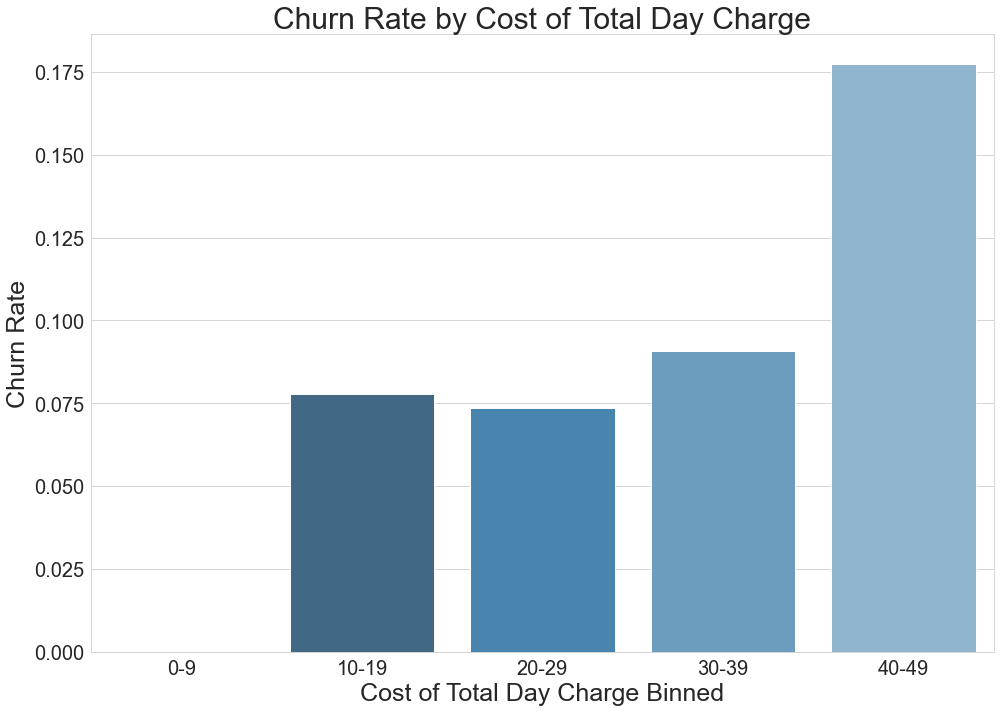

In [55]:
vm_msgs = df_num_vm_msgs.groupby(['bins'])['churn'].mean()

fig, ax = plt.subplots(figsize =(14,10))
sns.barplot(x = vm_msgs.index, y = vm_msgs.values, ax = ax, palette = "Blues_d")

plt.title('Churn Rate by Cost of Total Day Charge', fontsize = 30)
plt.xlabel('Cost of Total Day Charge Binned', fontsize = 25)
plt.ylabel('Churn Rate', fontsize = 25)
ax.set_xticklabels(['0-9', '10-19', '20-29','30-39', '40-49', '50-59'])

ax.tick_params(labelsize = 20)
plt.tight_layout()

In [13]:
# checking target balance

data.churn.value_counts(normalize=True)

# **LOOKS LIKE CLASS IMBALACE** - check if this needs to be addressed, and how.

False    0.855086
True     0.144914
Name: churn, dtype: float64

---

### Train Test Split

In [5]:
# splitting feature variables and target variable

X = df.drop('churn', axis=1)
y = df['churn']

In [6]:
# double checking cols to make sure we dropped the cols we wanted to.

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [7]:
# train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# saving y_train and y_test to src/data to use in other notebooks

# y_train.to_csv('../../src/data/y_train_seeded_42.csv')
# y_test.to_csv('../../src/data/y_test_seeded_42.csv')

In [9]:
# checking shape of split data sets

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2499, 18) (2499,)
(834, 18) (834,)


In [10]:
# checking target balance in y_train

y_train.value_counts()

False    2141
True      358
Name: churn, dtype: int64

---

## Preprocessing

#### SEPARATING cat & num cols in both train and test datasets- for OHE & scaling

In [11]:
# Checking dtypes of our features- to get an idea of what we need to ohe

X.dtypes.value_counts()

float64    8
int64      7
object     3
dtype: int64

In [12]:
# train num/cat cols

X_tr_cat = X_train.select_dtypes(include='object')
X_tr_num = X_train.select_dtypes(exclude='object')


# test num/cat cols

X_te_cat = X_test.select_dtypes(include='object')
X_te_num = X_test.select_dtypes(exclude='object')

#### OHE'ing cat cols in both train and test datasets

In [15]:
# OHE train

ohe = OneHotEncoder(sparse= False, drop= 'first')

X_tr_ohe = pd.DataFrame(ohe.fit_transform(X_tr_cat), 
                        index= X_tr_cat.index, 
                        columns=ohe.get_feature_names(X_tr_cat.columns))
print('X_tr_ohe shape:' ,X_tr_ohe.shape)


# OHE test

X_te_ohe = pd.DataFrame(ohe.transform(X_te_cat), 
                        index= X_te_cat.index, 
                        columns=ohe.get_feature_names(X_te_cat.columns))
print('X_te_ohe shape: ', X_te_ohe.shape)

X_tr_ohe shape: (2499, 52)
X_te_ohe shape:  (834, 52)


In [17]:
X_tr_ohe

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### SCALING ONLY num cols
- did this to compare model performance vs scaling all cols (inclouding dummies)
- model performed better when all cols were scaled

In [60]:
# train num cols scaling

ss_num_only_sc = StandardScaler()

X_tr_sc = pd.DataFrame(ss_num_only_sc.fit_transform(X_tr_num), 
                       index= X_tr_num.index, 
                       columns= X_tr_num.columns)
print('X_tr_sc shape: ',X_tr_sc.shape)


# test num cols scaling

X_te_sc = pd.DataFrame(ss_num_only_sc.transform(X_te_num), 
                       index= X_te_num.index, 
                       columns= X_te_num.columns)
print('X_te_sc shape: ', X_te_sc.shape)

X_tr_sc shape:  (2499, 15)
X_te_sc shape:  (834, 15)


#### JOINING scaled num and ohe cat cols together

In [61]:
X_tr_final = X_tr_sc.join(X_tr_ohe)
X_te_final = X_te_sc.join(X_te_ohe)

#### SCALING ALL cols (nums + dummy)

In [109]:
# joing num + ohe for both train and test:

X_tr_pre_sc = X_tr_num.join(X_tr_ohe)
X_te_pre_sc = X_te_num.join(X_te_ohe)


# creating 2nd instance of ss:
ss_all_sc = StandardScaler()


# scaling all train:
X_tr_final_sc = pd.DataFrame(ss_all_sc.fit_transform(X_tr_pre_sc), 
                       index= X_tr_pre_sc.index, 
                       columns= X_tr_pre_sc.columns)
print('X_tr_final_sc shape: ', X_tr_final_sc.shape)


# scaling all test:
X_te_final_sc = pd.DataFrame(ss_all_sc.transform(X_te_pre_sc), 
                       index= X_te_pre_sc.index, 
                       columns= X_te_pre_sc.columns)
print('X_te_final_sc shape: ', X_te_final_sc.shape)

X_tr_final_sc shape:  (2499, 67)
X_te_final_sc shape:  (834, 67)


In [89]:
# saving the following to the data folder:
# X_tr_final_sc
# X_te_final_sc

# X_tr_final_sc.to_csv('../../src/data/X_tr_final_sc_seeded_42.csv')
# X_te_final_sc.to_csv('../../src/data/X_te_final_sc_seeded_42.csv')

#### ---

#### correlation matrix

In [124]:
X_tr_cat_corr = X_tr_cat.drop('state', axis=1)
X_tr_cat_corr

# X_tr_num_corr = X_tr_num.drop(['total day minutes', 'total eve minutes', 
#                                'total night minutes', 'total intl minutes'], axis=1)

ohe_corr = OneHotEncoder()

X_tr_cat_corr_ohe = pd.DataFrame(ohe.fit_transform(X_tr_cat_corr), 
                        index= X_tr_cat_corr.index, 
                        columns=ohe.get_feature_names(X_tr_cat_corr.columns))

corr_combined_tr_pre_sc = X_tr_cat_corr_ohe.join(X_tr_num)


ss_corr = StandardScaler()

X_tr_corr_sc = pd.DataFrame(ss_corr.fit_transform(corr_combined_tr_pre_sc), 
                           index= corr_combined_tr_pre_sc.index, 
                           columns= corr_combined_tr_pre_sc.columns)

tr_corr_all = X_tr_corr_sc.join(y_train)
tr_corr_all.head()

,international plan_yes,voice mail plan_yes,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
367,-0.327448,-0.611418,-1.404508,-0.584700,-1.883677,1.330852,-1.884170,1.037727,0.401340,1.037905,1.069609,0.004940,1.071757,2.768109,-0.595235,2.767357,-0.427903,False
3103,-0.327448,-0.611418,0.366388,-0.584700,0.294083,0.529165,0.293703,0.516178,0.401340,0.517286,2.214376,0.670832,2.212569,1.051970,-1.417963,1.045965,0.324616,False
549,-0.327448,1.635543,0.518179,1.685101,1.056392,-1.875896,1.056666,0.093407,0.849774,0.094283,-0.077125,-0.763398,-0.077797,-0.056369,0.227493,-0.053077,1.829653,False
2531,-0.327448,-0.611418,2.010792,-0.584700,-0.679156,1.681590,-0.679320,-0.402459,0.650470,-0.403094,-0.322994,-0.660953,-0.322569,-0.056369,-0.183871,-0.053077,-0.427903,False
2378,-0.327448,-0.611418,0.290493,-0.584700,0.484660,1.080325,0.484172,-0.718549,-0.296224,-0.719184,-1.186487,0.056162,-1.188013,0.837453,1.050221,0.834102,1.077134,False


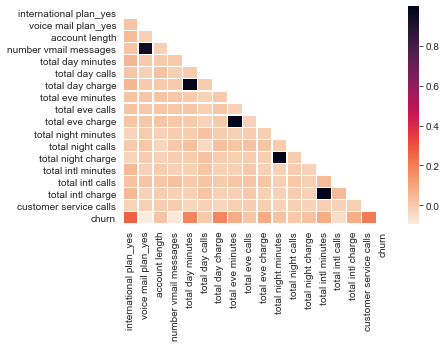

In [129]:
corr = tr_corr_all.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,linewidths=.25, mask = mask, cmap="rocket_r")

#### individual feature vs churn correlation graphs

bin: customer service calls, total day charge, 
bar: international plan, voice mail plan

In [135]:
data['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

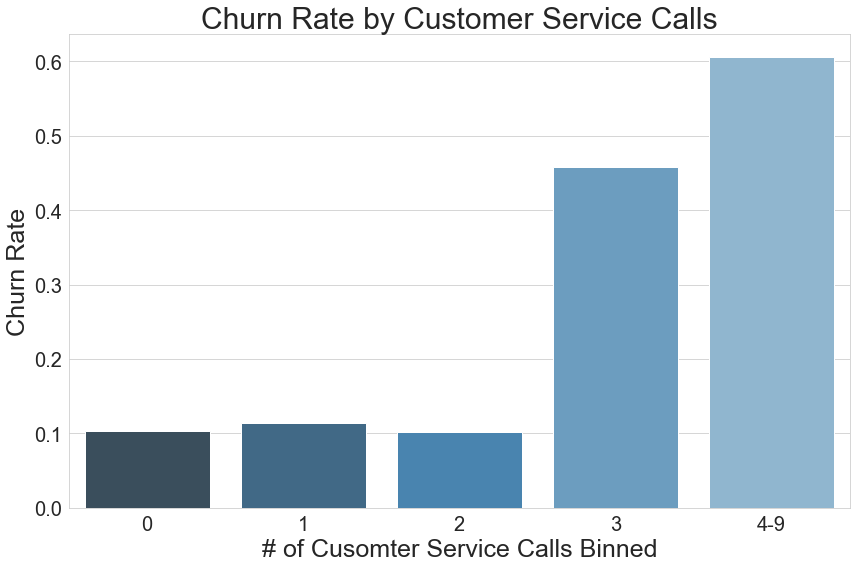

In [154]:
df_customer_serv_calls = data[['customer service calls','churn']].copy()

df_customer_serv_calls['bins'] = pd.cut(df_customer_serv_calls['customer service calls'],
                              bins=list(range(0,6,1)),
                              labels=list(range(0,5)))
df_customer_serv_calls


cust_svc_calls = df_customer_serv_calls.groupby(['bins'])['churn'].mean()

fig, ax = plt.subplots(figsize =(12,8))
sns.barplot(x = cust_svc_calls.index, y = cust_svc_calls.values, ax = ax, palette = "Blues_d")

plt.title('Churn Rate by Customer Service Calls', fontsize = 30)
plt.xlabel('# of Cusomter Service Calls Binned', fontsize = 25)
plt.ylabel('Churn Rate', fontsize = 25)
ax.set_xticklabels(['0', '1', '2','3', '4-9'])

ax.tick_params(labelsize = 20)
plt.tight_layout()

In [157]:
data['total day charge'].describe()

count    3333.000000
mean       30.562307
std         9.259435
min         0.000000
25%        24.430000
50%        30.500000
75%        36.790000
max        59.640000
Name: total day charge, dtype: float64

In [158]:
df_tot_day_charge = data[['total day charge','churn']].copy()

df_tot_day_charge['bins'] = pd.cut(df_tot_day_charge['total day charge'],
                              bins=list(range(0,70,10)),
                              labels=list(range(0,6)))
df_tot_day_charge

,total day charge,churn,bins
0,45.07,False,4
1,27.47,False,2
2,41.38,False,4
3,50.90,False,5
4,28.34,False,2
...,...,...,...
3328,26.55,False,2
3329,39.29,False,3
3330,30.74,False,3
3331,36.35,False,3


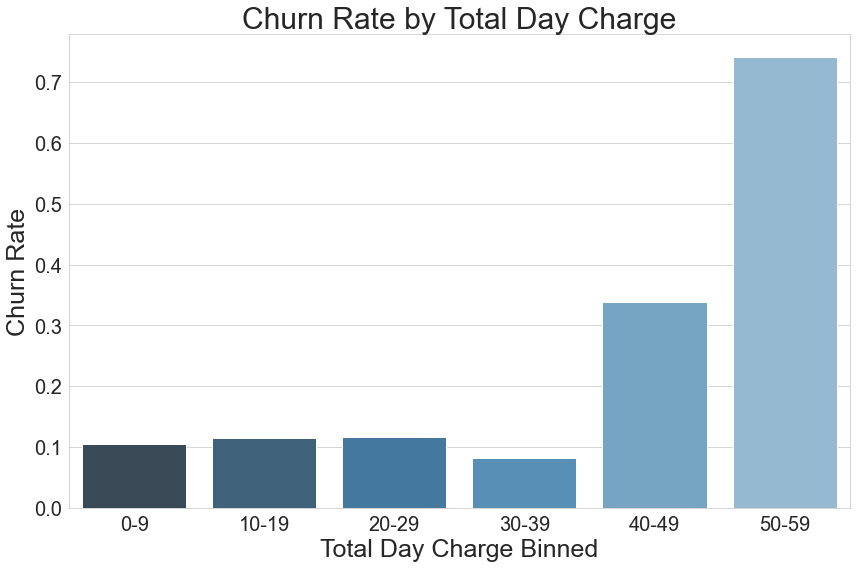

In [161]:
tot_day_charge = df_tot_day_charge.groupby(['bins'])['churn'].mean()

fig, ax = plt.subplots(figsize =(12,8))
sns.barplot(x = tot_day_charge.index, y = tot_day_charge.values, ax = ax, palette = "Blues_d")

plt.title('Churn Rate by Total Day Charge', fontsize = 30)
plt.xlabel('Total Day Charge Binned', fontsize = 25)
plt.ylabel('Churn Rate', fontsize = 25)
ax.set_xticklabels(['0-9', '10-19', '20-29','30-39', '40-49', '50-59'])

ax.tick_params(labelsize = 20)
plt.tight_layout()

---

## Modeling

### Functions

In [63]:
def plot_feature_importances(model):
    n_features = X_tr_final.shape[1]
    plt.figure(figsize=(8,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_tr_final.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

#### Confusion Matrices & True vs False definition:

Trying to minimize false negative ultimately.

That will be calculated by recall.

### Logistic Regression

#### lg 1

In [64]:
# lg 1 (random_state=42)
# instantiating logistic regression instance and fitting final train data to model. 
# calc'ed f1 score of lg1 on final test data.

lg1 = LogisticRegression(random_state=42)

lg1.fit(X_tr_final, y_train)

lg1_y_pred = lg1.predict(X_te_final)

f1_score(y_test, lg1_y_pred)

0.2976190476190476

In [67]:
# accuracy score of lg1

lg1.score(X_te_final, y_test)

0.8585131894484412

In [68]:
# cross val score- f1 score & accuracy- for both train X/y and test X/y.

print(f"cross-val train f1: {cross_val_score(LogisticRegression(random_state=42), X_tr_final, y_train, cv= 5, scoring= 'f1').mean()},", 
      f"cross-val train accuracy: {cross_val_score(LogisticRegression(random_state=42), X_tr_final, y_train, cv= 5, scoring= 'accuracy').mean()},")

print(f"cross-val test f1: {cross_val_score(LogisticRegression(random_state=42), X_te_final, y_test, cv= 5, scoring= 'f1').mean()},", 
    f"cross-val test accuracy: {cross_val_score(LogisticRegression(random_state=42), X_te_final, y_test, cv= 5, scoring= 'accuracy').mean()}")

# Doesn't seem like we're overfitting

cross-val train f1: 0.309743732489512, cross-val train accuracy: 0.8623438877755512,
cross-val test f1: 0.33642051627889547, cross-val test accuracy: 0.8585022725633072


In [69]:
# checking coefs of lg1

np.set_printoptions(suppress=True) # removing scientific notation

lg1.coef_

# zip these with your column names
# high neg value has more influence on the 0 class, and high positive value has more influence on the 1 class.
# (not imp here, but how does coefs relate to ternary classification)

array([[ 0.0306978 ,  0.04202787,  0.31414953,  0.01548552,  0.31663533,
         0.17901127,  0.02951557,  0.17055173,  0.07865886, -0.00260693,
         0.07007188,  0.1126401 , -0.23270578,  0.13827636,  0.68352714,
        -0.65875456,  0.4016612 , -0.4955785 ,  0.44902142, -0.30626158,
         0.06661407,  0.00161664, -0.13903379, -0.10346423,  0.23334176,
        -0.52946874, -0.70932101, -0.07736422, -0.69406736,  0.10215233,
         0.30849519,  0.22532277, -0.25889111,  0.20826322,  0.41203801,
         0.57259001,  0.41406182,  0.40849551, -0.19068752,  0.49495951,
         0.90862808,  0.14931413, -1.04913947,  0.07910414,  0.11904798,
         0.64354276, -0.11768059,  0.57416653,  0.28648599, -0.00463758,
        -0.1255796 ,  0.31501283,  0.52932077, -0.43066783,  0.65669253,
        -0.22532619, -0.25078949,  0.79011665, -0.04475471, -0.60066857,
        -0.94272281,  0.45043374, -0.2569797 , -0.05865461, -0.22747016,
         2.14106781, -0.97112773]])

In [70]:
# checking column that match to above ceofs

X_tr_final.columns

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA',
       'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA',
       'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH',
       'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN',
       'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI',
       'state_W

In [168]:
# zipping the coefs to their col

lg1_summary = list(zip(X_tr_final.columns, lg1.coef_[0]))
lg1_summary = sorted(lg1_summary,key=itemgetter(1))
lg1_summ_df = pd.DataFrame(lg1_summary, columns=['features', 'log_reg_coef'])

In [171]:
lg1_summ_df

,features,log_reg_coef
0,state_ND,-1.049139
1,voice mail plan_yes,-0.971128
2,state_VT,-0.942723
3,state_IA,-0.709321
4,state_IL,-0.694067
...,...,...
62,state_SC,0.656693
63,customer service calls,0.683527
64,state_TX,0.790117
65,state_MT,0.908628


In [173]:
lg1_summ_df_reduced = lg1_summ_df[abs(lg1_summ_df.log_reg_coef) > 0.1]
list(lg1_summ_df_reduced.features)

['state_ND',
 'voice mail plan_yes',
 'state_VT',
 'state_IA',
 'state_IL',
 'state_AL',
 'state_VA',
 'state_HI',
 'state_AZ',
 'state_RI',
 'state_CO',
 'state_LA',
 'state_WI',
 'state_TN',
 'total intl calls',
 'state_WY',
 'state_SD',
 'state_MO',
 'state_DE',
 'state_OK',
 'state_NM',
 'state_FL',
 'state_IN',
 'total intl minutes',
 'state_NH',
 'total intl charge',
 'state_NC',
 'total eve charge',
 'total eve minutes',
 'state_MA',
 'state_KY',
 'state_GA',
 'state_NY',
 'state_KS',
 'total day minutes',
 'state_OR',
 'total day charge',
 'state_AR',
 'state_MN',
 'state_MD',
 'state_MI',
 'state_CA',
 'state_WA',
 'state_MS',
 'state_PA',
 'state_ME',
 'state_NV',
 'state_NJ',
 'state_SC',
 'customer service calls',
 'state_TX',
 'state_MT',
 'international plan_yes']

In [176]:
X_tr_final_reduced_lr = X_tr_final[list(lg1_summ_df_reduced.features)]
X_te_final_reduced_lr = X_te_final[list(lg1_summ_df_reduced.features)]

lg_red_cols = LogisticRegression(random_state=42)

lg_red_cols.fit(X_tr_final_reduced_lr, y_train)

lg_red_cols_y_pred = lg_red_cols.predict(X_te_final_reduced_lr)

f1_score(y_test, lg_red_cols_y_pred)

0.2682926829268293

In [72]:
# what do these coefs mean? should we do a heat map? a confusion matrix?
# look into feature selection for log reg, and also param hypertuning

In [73]:
# lg 2 (random_state=42, test with scaled final data set)

lg2 = LogisticRegression(random_state=42)

lg2.fit(X_tr_final_sc, y_train)

lg2_y_pred = lg2.predict(X_te_final_sc)

print('lg1 scores: ', f1_score(y_test, lg1_y_pred))
print('lg2 scores: ', f1_score(y_test, lg2_y_pred))

# looks like scaling the categoricals helped our score. So do this

lg1 scores:  0.2976190476190476
lg2 scores:  0.3236994219653179


In [74]:
# all scaled data log reg cross-val scores:

print(f"cross-val train f1: {cross_val_score(LogisticRegression(random_state=42), X_tr_final_sc, y_train, cv= 5, scoring= 'f1').mean()},", 
      f"cross-val train accuracy: {cross_val_score(LogisticRegression(random_state=42), X_tr_final_sc, y_train, cv= 5, scoring= 'accuracy').mean()},")

print(f"cross-val test f1: {cross_val_score(LogisticRegression(random_state=42), X_te_final_sc, y_test, cv= 5, scoring= 'f1').mean()},", 
    f"cross-val test accuracy: {cross_val_score(LogisticRegression(random_state=42), X_te_final_sc, y_test, cv= 5, scoring= 'accuracy').mean()}")

cross-val train f1: 0.3453162971664997, cross-val train accuracy: 0.8659470941883768,
cross-val test f1: 0.377631922498627, cross-val test accuracy: 0.846511795685737


In [97]:
cross_val_score(LogisticRegression(random_state=42), X_te_final_sc, y_test, cv= 5).mean()

0.846511795685737

In [75]:
print(confusion_matrix(y_test, lg2_y_pred))

[[689  20]
 [ 97  28]]


In [76]:
# true negative = [0][0] = predicted stayed(false) == actually stayed(false)
# false negative = [1][0] = predicted stayed(false) !! actually left(true) --> secondary goal --> minimize this
# false positive = [0][1] = predicted left(true) !! actually stayed(false)
# true positive = [1][1] = predicted left(true) == actually left(true)

# correctly predicted 689 stayed
# correctly predicted 28 left
# incorrectly predicted 20 left, but they stayed
# incorrectly predicted 97 stayed, but they left

In [ ]:
cross_val_score()